# Linear Regression in tensorflow

## 1.1  Linear Regression with multiple variable (multiple/multivariable linear regression)

<img src="mult_lin_reg_2.PNG">

#### when there are more than one independent variables. It is called a multivariate linear regression

#### problem Statement - To predict the price of a house given there size(in square feet) and number of bedrooms

In [1]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import tensorflow as tf

### Load the data file

In [2]:
path = os.getcwd() + '\ex1data2.txt'  
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head()
num_samples = data2['Size'].count()
print ('num of samples: ',num_samples)


num of samples:  47


In [3]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


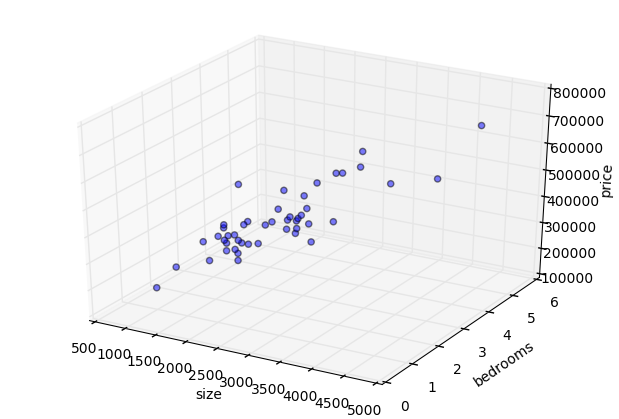

In [4]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'],data2['Bedrooms'],data2['Price'],c='blue',marker='o',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

####  feature normalization -  we need to adjust the scale of the features. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. Fortunately this is one line of code using pandas.

In [5]:
mean = data2.mean()
std = data2.std()
data_norm = (data2 - mean) / std  
data_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
data_norm.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


### the input data and output data

In [7]:
feature_names = ["Size", "Bedrooms"]
#data_x = data2.loc[:,columns]
data_x=data_norm[feature_names]
data_y = data_norm["Price"]
#print ('input_shape: ', data_x.shape)
#print ('output_shape: ', data_y.shape)
#data_x1 = data_norm["Size"]
#data_x2 = data_norm["Bedrooms"]
#print ('single_input_shape: ', data_x1.shape)
data_x = np.array(data_x,dtype='float32')
data_y = np.array(data_y,dtype='float32')
num_features=data_x.shape[1]
print ('num of features: ',num_features)

num of features:  2


##### This may occur, for example, if an operation is receives an input tensor that has an invalid value or shape. For example, the tf.matmul op will raise this error if it receives an input that is not a matrix, 

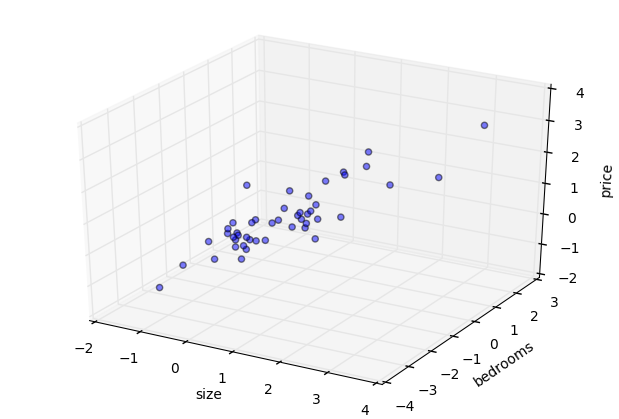

In [8]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x[0:,0],data_x[0:,1],data_y,c='blue',marker='o',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

### For two features

###     linear reg model, a = w1.x1 + w2.x2 + b
                a = Wx + b

#### create placeholders for input X1,X2 (size,bedrooms) and label Y (price)

In [9]:
with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32, [num_samples, 2], name="inputs")
    Y = tf.placeholder(tf.float32, [num_samples, 1],name="true_output")
    #X = tf.placeholder(tf.float32, [None, 2], name="inputs")
    #Y = tf.placeholder(tf.float32, [None, 1],name="true_output")

#### Create weights and bias variable initialized to 0

In [10]:
with tf.name_scope('parameters'):
    W = tf.Variable(tf.zeros([num_features,1]), name="weights")
    b = tf.Variable(tf.zeros([1]), name="bias")

#### Define the linear regression model to predict the price based on size and num of bedroom 
 y_predicted = X1.w1 + X2.w2 + b
         
         or
         
y = tf.matmul(x, W) + b

In [11]:
with tf.name_scope('regression_model'):
  Y_predicted = tf.matmul(data_x,W) + b

#### Define the square error function as loss function to monitor the performance of model as well as for gradient descent

In [12]:
with tf.name_scope('loss_function'):
    loss = tf.reduce_sum(tf.square(Y-Y_predicted,name = 'loss'))/(2*num_samples)
   # loss = tf.reduce_mean(tf.square(Y-Y_predicted,name = 'loss'))

#### Define a gradient descent optimizer for optimizing the weights and biases of the model

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

#### creating summary for writing loss function in event file

In [14]:
# Add summary ops to collect data
# Add summary ops to collect data
W_hist = tf.summary.histogram("weights", W)
b_hist = tf.summary.histogram("biases", b)
y_hist = tf.summary.histogram("y_predicted", Y_predicted)
cost = tf.summary.scalar('loss',loss)
# merge all the summaries
merged_summaries = tf.summary.merge_all()


#### Saving the trained model using saver op

In [15]:
# Create a Saver object
saver = tf.train.Saver()

### Training the model by launching the graph through session

In [16]:
data_x_f = np.reshape(data_x,(num_samples,2))
data_y_f = np.reshape(data_y,(num_samples,1))
#final_data_x = np.array([[x[0], x[1]] for x in data_x]) 
#print('input_shape: ',data_x_f.shape)
#print('out_shape: ',data_y_f.shape)
cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    # create a summary writer
    summary_writer = tf.summary.FileWriter('./matrices_mult_lin_reg_summary',sess.graph)
    # initialize the defined w and b variables
    sess.run(tf.global_variables_initializer())
    # Train the model
    for i in range(1000): # train the model for 100 iterations
        # for every iteration all the data is passed
        #for x,y in zip(data_x_f,data_y_f):
            #print (x.shape)
            #print(np.matrix(y).shape)
            # run the trining function to minimize the loss using 
            #defined optimizer
        _,loss_v,summary=sess.run([train_op,loss,merged_summaries],feed_dict={X:data_x_f,Y:data_y_f})
        cost_history=np.append(cost_history,loss_v)
            #summary_writer.add_summary(summary,i)
        # output the weight and bias value after every iteration
        if i%20==0:
            print ('loss is: ',loss_v)
            summary_writer.add_summary(summary,i)
    w_value,b_value = sess.run([W,b])
        #print (w_value,b_value)
        # print the loss function after every iteration
        #loss_value = sess.run(loss)
    saver.save(sess, '.\saved_model_matrices_mult\model_final_matrices_mult_lin_reg')
summary_writer.close()

loss is:  0.489362
loss is:  0.472094
loss is:  0.455782
loss is:  0.44037
loss is:  0.425806
loss is:  0.412041
loss is:  0.399028
loss is:  0.386723
loss is:  0.375087
loss is:  0.36408
loss is:  0.353666
loss is:  0.343811
loss is:  0.334483
loss is:  0.325651
loss is:  0.317287
loss is:  0.309365
loss is:  0.301859
loss is:  0.294745
loss is:  0.288001
loss is:  0.281605
loss is:  0.275539
loss is:  0.269784
loss is:  0.264321
loss is:  0.259134
loss is:  0.254209
loss is:  0.249529
loss is:  0.245081
loss is:  0.240853
loss is:  0.236832
loss is:  0.233007
loss is:  0.229366
loss is:  0.225899
loss is:  0.222598
loss is:  0.219452
loss is:  0.216453
loss is:  0.213593
loss is:  0.210865
loss is:  0.208261
loss is:  0.205775
loss is:  0.2034
loss is:  0.201131
loss is:  0.198961
loss is:  0.196886
loss is:  0.1949
loss is:  0.192998
loss is:  0.191177
loss is:  0.189432
loss is:  0.187758
loss is:  0.186153
loss is:  0.184613


### Plotting the cost function

1001


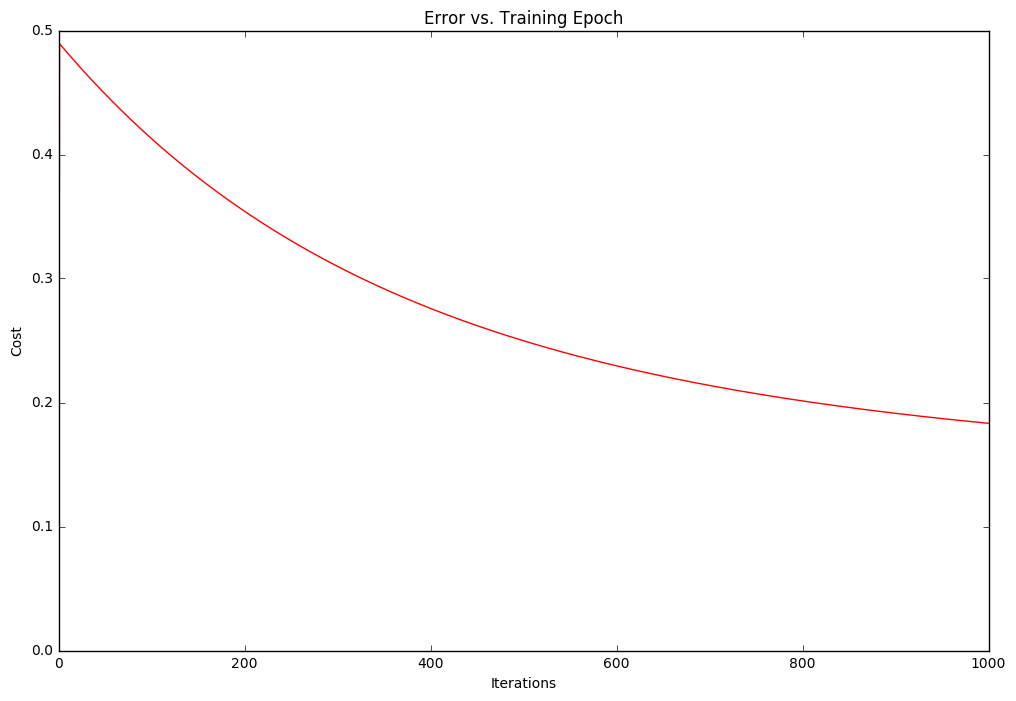

In [17]:
len = cost_history.shape[0]
print (len)
iters = len
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [18]:
x_test = np.array(data_x[0:5])

y_test = np.array(data_y[0:5])
y_test_predicted=tf.matmul(x_test,w_value)+b_value
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)
with tf.Session() as sess:
    sess.run(y_test_predicted)
    print (y_test_predicted.eval())

predicted_value:  Tensor("add:0", shape=(5, 1), dtype=float32)
true_value:  [ 0.47574687 -0.08407444  0.22862574 -0.86702454  1.59538949]
[[ 0.02755686]
 [-0.28301612]
 [ 0.20995685]
 [-0.60854661]
 [ 0.79183328]]


In [19]:
x_test = np.array(data_x)
y_test = np.array(data_y)
y_test_predicted=tf.matmul(x_test,w_value)+b_value
with tf.Session() as sess:
    sess.run(y_test_predicted)
    print (y_test_predicted.eval())

[[ 0.02755686]
 [-0.28301612]
 [ 0.20995685]
 [-0.60854661]
 [ 0.79183328]
 [ 0.16637385]
 [-0.32368639]
 [-0.38962153]
 [-0.41858366]
 [-0.34833503]
 [ 0.13864411]
 [-0.03652963]
 [-0.10431342]
 [ 1.91474771]
 [-0.48759991]
 [ 0.36048198]
 [-0.66770339]
 [-0.50731879]
 [ 0.55089277]
 [ 0.81093603]
 [-0.18010801]
 [-0.31769258]
 [-0.28055125]
 [ 0.15220088]
 [ 1.12811899]
 [-0.59112424]
 [-0.3705188 ]
 [ 0.2876001 ]
 [ 0.08671361]
 [ 0.3560001 ]
 [-0.34788716]
 [-1.07703924]
 [ 0.20026574]
 [ 0.66410822]
 [ 0.05915222]
 [-0.38345936]
 [-0.50547016]
 [ 0.25695765]
 [ 1.54053593]
 [ 0.27544412]
 [-0.45572501]
 [ 0.11012983]
 [ 0.52501166]
 [-0.52950263]
 [-0.9560926 ]
 [ 0.08441709]
 [-0.52765399]]


In [20]:
#plt.plot(x2_test,y_test,'o', x2_test,y_test_predicted,"-")
#plt.xlabel("num of bedrooms")
#plt.ylabel("price $")
#plt.legend(['data_X2:#bedrooms', 'Regression Model(a=w1*x1+w2*x2+b)'],bbox_to_anchor=(1, 1),loc=4)
#plt.show()

### final trained parameters

In [21]:
print('final weights: ', w_value)
print('final bias: ', b_value)

final weights:  [[ 0.48970848]
 [ 0.16143981]]
final bias:  [ -7.45056534e-12]


### Plotting the multiple linear regression model

(100, 100)


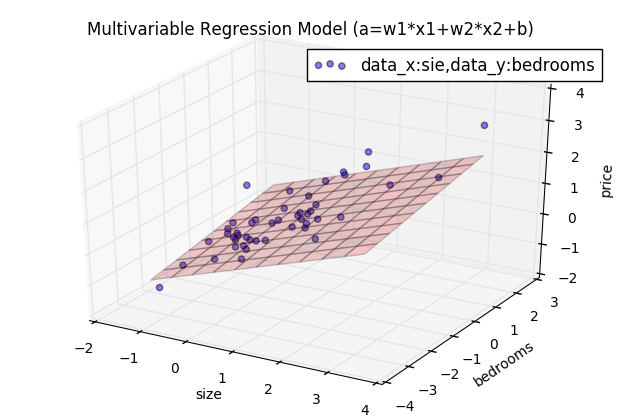

In [22]:

x1_surf,x2_surf= np.meshgrid(np.linspace(data_x[0:,0].min(),data_x[0:,0].max(),100),np.linspace(data_x[0:,1].min(),data_x[0:,1].max(),100))
#y_test_predicted_ = np.meshgrid(np.linspace(y_test_predicted.min(),y_test_predicted.max(),100))
Y_predicted_surf = x1_surf*w_value[0]+x2_surf*w_value[1]+b_value
print (Y_predicted_surf.shape)
#fittedY.reshape(x_surf.shape)
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)
sct = ax.scatter(data_x[0:,0],data_x[0:,1],data_y,c='blue', marker='o',alpha=0.5)
plt_surf = ax.plot_surface(x1_surf,x2_surf,Y_predicted_surf,color='red',alpha = 0.2)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.title('Multivariable Regression Model (a=w1*x1+w2*x2+b)')
plt.legend(['data_x:sie,data_y:bedrooms'],bbox_to_anchor=(1, 0.8),loc=4)
plt.show()

### Using the saved model

In [23]:
tf.reset_default_graph()  
with tf.Session() as sess:  
    imported_meta = tf.train.import_meta_graph(".\saved_model_matrices_mult\model_final_matrices_mult_lin_reg.meta")
    imported_meta.restore(sess, tf.train.latest_checkpoint('./saved_model_matrices_mult/'))
    w_final = sess.run(('parameters/weights:0'))
    b_final = sess.run(('parameters/bias:0'))
    print("wieights final: {}".format (w_final))
    print("bias final: {}".format (b_final))

INFO:tensorflow:Restoring parameters from ./saved_model_matrices_mult/model_final_matrices_mult_lin_reg
wieights final: [[ 0.48970848]
 [ 0.16143981]]
bias final: [ -7.45056534e-12]
